# Handwriting Recognition

This project focuses on recognizing the handwritten text and display the output

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from tensorflow import keras

Importing Dataset from Tensorflow

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

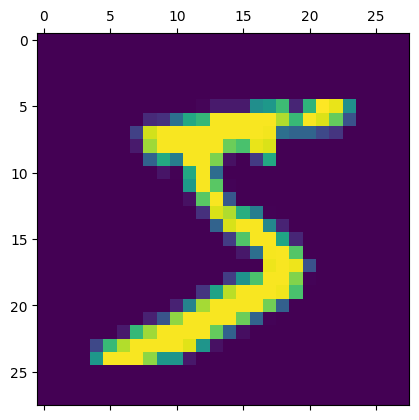

In [5]:
plt.matshow(x_train[0])

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

First Sequential Training

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid' )
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flatten, y_train, epochs = 10)
history1 = model.fit(x_train_flatten, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7661 - loss: 18.6266
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8780 - loss: 5.9395
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8844 - loss: 5.7007
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8862 - loss: 5.3205
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8891 - loss: 5.0983
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8910 - loss: 5.1231
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8884 - loss: 5.1315
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8913 - loss: 4.9626
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8894 - loss: 5.1338
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8938 - loss: 4.9746
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8914 - loss: 4.9801
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━

In [22]:
model.evaluate(x_test_flatten, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8840 - loss: 6.4504


[5.833042621612549, 0.8956999778747559]

In [23]:
y_predicted = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [24]:
y_predicted[0]

array([0.        , 0.        , 0.        , 1.        , 0.22312984,
       1.        , 0.        , 1.        , 1.        , 1.        ],
      dtype=float32)

In [25]:
np.argmax(y_predicted[0])

3

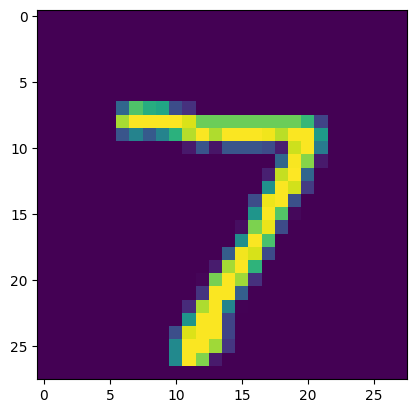

In [26]:
plt.imshow(x_test[0])

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    1,    0,    1,    0,    0,    0,    0,    0],
       [   4, 1131,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 439,  428,  165,    0,    0,    0,    0,    0,    0,    0],
       [ 568,  302,  123,   17,    0,    0,    0,    0,    0,    0],
       [ 174,  178,  365,  170,   95,    0,    0,    0,    0,    0],
       [ 579,   90,  123,   58,   34,    8,    0,    0,    0,    0],
       [ 388,  215,  354,    0,    1,    0,    0,    0,    0,    0],
       [  69,  128,  248,  572,    8,    1,    0,    2,    0,    0],
       [ 212,  504,  226,   11,   18,    3,    0,    0,    0,    0],
       [  51,  136,  311,  481,   30,    0,    0,    0,    0,    0]],
      dtype=int32)>

Correlation Heatmap

Text(95.72222222222221, 0.5, 'Truth')

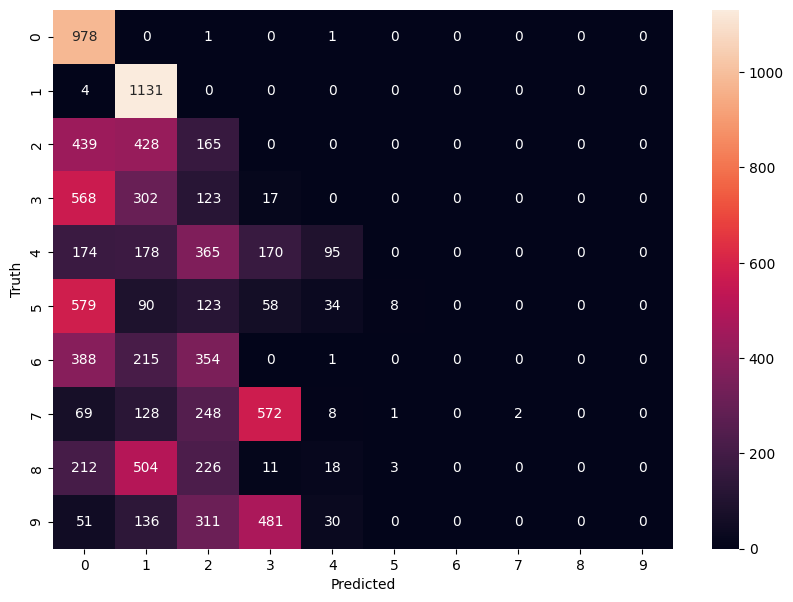

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate model_3 with more metrics
loss, accuracy = model.evaluate(x_test_flatten, y_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Calculate additional metrics
precision = precision_score(y_test, y_predicted_labels, average='macro')
recall = recall_score(y_test, y_predicted_labels, average='macro')
f1 = f1_score(y_test, y_predicted_labels, average='macro')

# Print evaluation metrics
print(f"Model 3 Evaluation:")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8840 - loss: 6.4504
Model 3 Evaluation:
Loss: 5.833042621612549
Accuracy: 0.8956999778747559
Precision: 0.29197195241087076
Recall: 0.2278805838049948
F1-score: 0.12836699226265522


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


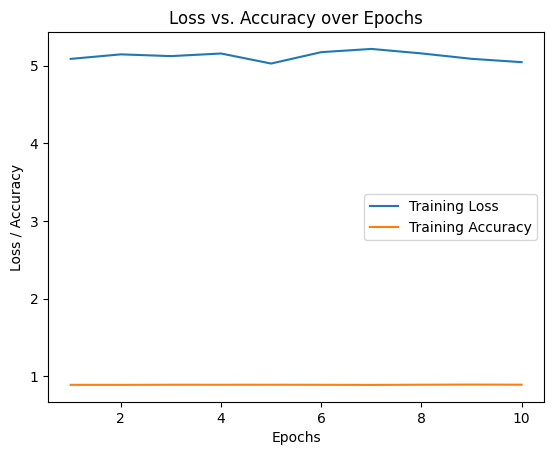

In [32]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values from the training history
train_loss = history1.history['loss']
train_accuracy = history1.history['accuracy']

# Create the line graph
epochs = range(1, len(train_loss) + 1)  # Epochs for x-axis
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, train_accuracy, label='Training Accuracy')

# Customize the plot
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.title('Loss vs. Accuracy over Epochs')
plt.legend()  # Show legend for labels

# Display the plot
plt.show()

In [33]:
x_train = x_train / 255
x_test = x_test / 255

In [34]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

Second Training

In [36]:
model_2 = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'relu' ),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(x_train_flatten, y_train, epochs=5)
history2 = model_2.fit(x_train_flatten, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7485 - loss: 0.8725
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9096 - loss: 0.3155
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9180 - loss: 0.2899
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9219 - loss: 0.2708
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9272 - loss: 0.2581
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9296 - loss: 0.2492
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9321 - loss: 0.2345
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9337 - loss: 0.2347
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9377 - loss: 0.2204
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9378 - loss: 0.2143
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9378 - loss: 0.2177
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━

In [37]:
y_predicted_2 = model_2.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
#
y_predicted_2[0]

array([3.6675375e-02, 7.8781814e-10, 1.2700858e-02, 9.8811430e-01,
       4.6690134e-06, 6.4545386e-02, 7.9018703e-13, 9.9999148e-01,
       1.1274340e-02, 1.3384427e-02], dtype=float32)

In [39]:
y_test[0]

7

In [40]:
np.argmax(y_predicted_2[0])

7

In [41]:
y_predicted_labels_2 = [np.argmax(i) for i in y_predicted_2]

In [42]:
cm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 947,    0,    2,    1,    0,    6,   20,    3,    1,    0],
       [   0, 1117,    6,    0,    0,    1,    3,    2,    6,    0],
       [  10,    6,  958,   22,    3,    2,    9,    8,   13,    1],
       [   6,    2,   19,  930,    0,   18,    4,   16,   13,    2],
       [   0,    1,    4,    1,  938,    0,   15,    3,    5,   15],
       [  18,    2,    8,   29,    1,  787,   16,    5,   20,    6],
       [  11,    3,    2,    0,    7,    9,  924,    0,    2,    0],
       [   1,    8,   19,    8,    6,    0,    1,  971,    2,   12],
       [  10,    7,    4,   19,   11,   11,   12,   13,  879,    8],
       [  13,    5,    0,    6,   30,    8,    0,   19,   10,  918]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

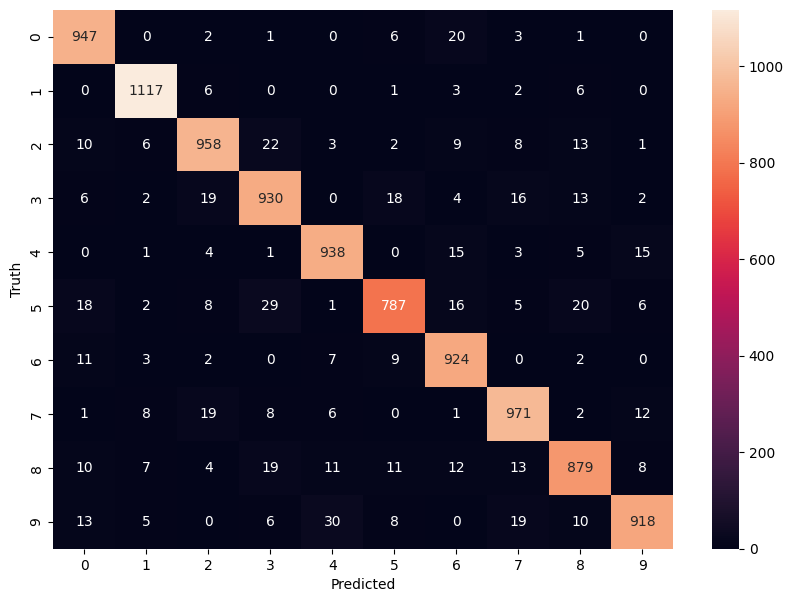

In [43]:
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9278 - loss: 0.2556
Model 2 Evaluation:
Loss: 0.2245267629623413
Accuracy: 0.9369999766349792
Precision: 0.9364250254367041
Recall: 0.9358372315041257
F1-score: 0.9358911564541186


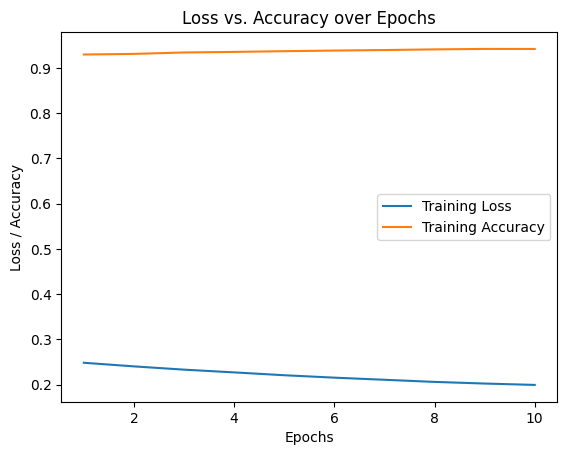

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate model_3 with more metrics
loss, accuracy = model_2.evaluate(x_test_flatten, y_test)
y_predicted_labels_2 = [np.argmax(i) for i in y_predicted_2]

# Calculate additional metrics
precision = precision_score(y_test, y_predicted_labels_2, average='macro')
recall = recall_score(y_test, y_predicted_labels_2, average='macro')
f1 = f1_score(y_test, y_predicted_labels_2, average='macro')

# Print evaluation metrics
print(f"Model 2 Evaluation:")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Extract loss and accuracy values from the training history
train_loss = history2.history['loss']
train_accuracy = history2.history['accuracy']

# Create the line graph
epochs = range(1, len(train_loss) + 1)  # Epochs for x-axis
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, train_accuracy, label='Training Accuracy')

# Customize the plot
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.title('Loss vs. Accuracy over Epochs')
plt.legend()  # Show legend for labels

# Display the plot
plt.show()

In [46]:
model_3 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu' ),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train_flatten, y_train, epochs=10)
history = model_3.fit(x_train_flatten, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8754 - loss: 0.4433
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9628 - loss: 0.1267
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9748 - loss: 0.0884
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9810 - loss: 0.0641
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9840 - loss: 0.0514
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9872 - loss: 0.0419
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0321
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9914 - loss: 0.0271
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9943 - loss: 0.0205
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9942 - loss: 0.0187
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0147
Epoch 2/10
1875/1875 ━━━━━━━━━━

In [47]:
y_predicted_3 = model_3.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
y_predicted_labels_3 = [np.argmax(i) for i in y_predicted_3]

In [49]:
cm3 = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_2)
cm3

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 947,    0,    2,    1,    0,    6,   20,    3,    1,    0],
       [   0, 1117,    6,    0,    0,    1,    3,    2,    6,    0],
       [  10,    6,  958,   22,    3,    2,    9,    8,   13,    1],
       [   6,    2,   19,  930,    0,   18,    4,   16,   13,    2],
       [   0,    1,    4,    1,  938,    0,   15,    3,    5,   15],
       [  18,    2,    8,   29,    1,  787,   16,    5,   20,    6],
       [  11,    3,    2,    0,    7,    9,  924,    0,    2,    0],
       [   1,    8,   19,    8,    6,    0,    1,  971,    2,   12],
       [  10,    7,    4,   19,   11,   11,   12,   13,  879,    8],
       [  13,    5,    0,    6,   30,    8,    0,   19,   10,  918]],
      dtype=int32)>

In [50]:
model_3.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9717 - loss: 0.1335


[0.11461701989173889, 0.9751999974250793]

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate model_3 with more metrics
loss, accuracy = model_3.evaluate(x_test_flatten, y_test)
y_predicted_labels_3 = [np.argmax(i) for i in y_predicted_3]

# Calculate additional metrics
precision = precision_score(y_test, y_predicted_labels_3, average='macro')
recall = recall_score(y_test, y_predicted_labels_3, average='macro')
f1 = f1_score(y_test, y_predicted_labels_3, average='macro')

# Print evaluation metrics
print(f"Model 3 Evaluation:")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9717 - loss: 0.1335
Model 3 Evaluation:
Loss: 0.11461701989173889
Accuracy: 0.9751999974250793
Precision: 0.9750300637580253
Recall: 0.9748727002238138
F1-score: 0.9748570443994578


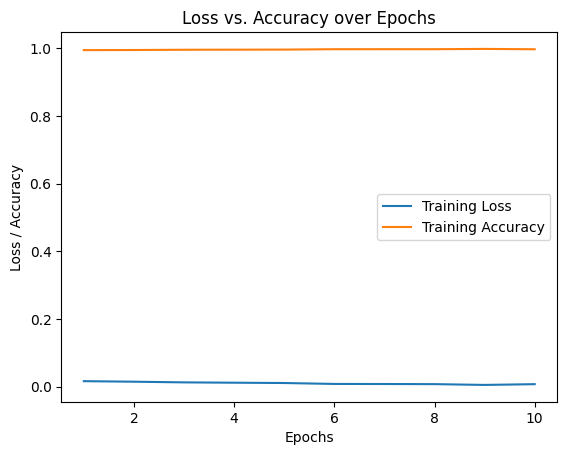

In [52]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values from the training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Create the line graph
epochs = range(1, len(train_loss) + 1)  # Epochs for x-axis
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, train_accuracy, label='Training Accuracy')

# Customize the plot
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.title('Loss vs. Accuracy over Epochs')
plt.legend()  # Show legend for labels

# Display the plot
plt.show()

Text(95.72222222222221, 0.5, 'Truth')

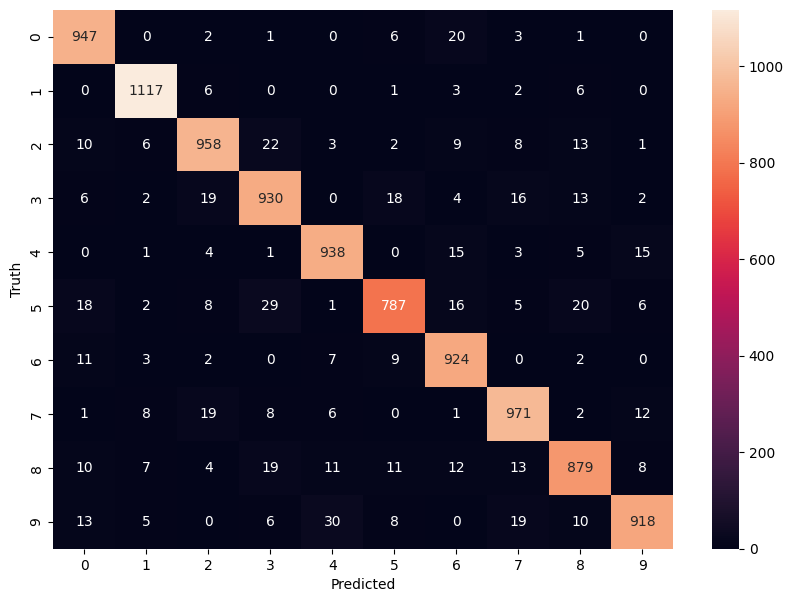

In [53]:
plt.figure(figsize = (10,7))
sn.heatmap(cm3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
print(y_predicted_labels_3)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [35]:
import pickle as pkl

In [ ]:
model_pkl_file = "Digit_classifier.pkl"
with open(model_pkl_file, 'wb') as file:
    pkl.dump(model_3, file)

In [ ]:
from keras.models import load_model

model_3.save('Digit_classifier.h5')  # creates a HDF5 file 'my_model.h5'
# deletes the existing model

# returns a compiled model
# identical to the previous one

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
